# BOSCH Production line Performance

## Introduction

### Problem Statement and Solution: 

Ensuring the procedures for the production of the advanced mechanical components to be of the highest quality is an imperative for the most world's leading manufacturing companies. In general quality control of a particular component is done by sampling rather than inspecting the whole lot. Sometimes this can lead to the rejection of an entire batch which is solely based on the conclusions drawn from the sample inspection. Using Data Analytics, we can solve this problem by analyzing each component’s quality in real time. Part of doing so is closely monitoring its parts as they progress through the manufacturing processes.

![Image](https://www.codemade.io/wp-content/uploads/2016/10/bosch-production-line-performance-kaggle-1476241292g48kn.jpg)

## Introduction to Dataset
The dataset I have chosen represents measurements of parts as they move through Bosch’s production lines. Each part has a unique Id. The goal is to predict which parts will fail quality control (represented by a 'Response' = 1). The dataset contains an extremely large number of anonymized features. Features are named according to a convention that tells you the production line, the station on the line, and a feature number. E.g. L3_S36_F3939 is a feature measured on line 3, station 36, and is feature number 3939. 
On account of the large size of the dataset, data has been separated into the files by the type of feature they contain: 
 - Numerical 
 - Categorical 
 - Date features. The date features provide a timestamp for when each measurement was taken. 

The number of features are 2141, 970, 1157 for categorical, numeric and date respectively. The number of samples are around 1.18 Million and I also observed that there are a lot of null values in the categorical and numeric data sets 

## Data Transformation using Power Query in Excel
Bosch Production line performance being one of the largest dataset (interms of features) Kaggle has ever hosted, it was quite difficult to preprocess the data.Keeping memory storage handling in mind, I have dropped all of the date features and did sampling on the whole data set and selected 10000 samples for both categorical features and numerical features. In order to have balanced data set I have chosen samples with 9000 target variables (response) as '0' and 1000 target variables as '1', where '0' represents a perfect part and '1' represents a failed part. For doing this I have imported this large data set into Power Query of Microsoft Excel and sorted the Response Column of numerical features for 9000 zeroes and loaded them into a separate CSV file. Similarly I have sorted the Response Column of numerical features for 1000 ones and loaded them into a separate CSV file. I have joined these two tables and filtered them with respect to their Id's thereafter. For Categorical features I have merged the Response column of the numerical feaures with categorical features and performed the same tasks as mentioned before for numerical features. Now, I have a dataset with 10000 samples and 2141 Categorical Features and 967 numerical features.

*** The reason why I have to use Power Query Tool is that it was impossible to load this much data into python directly as it would show memory handling error. My other alternatives were to use a Big Data cluster and then retrieve the data files through HIVE and then program the data using Scala or PySpark.

## Import Required Libraries

In [192]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

from collections import Counter, defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, r2_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [193]:
# Changes the path of the file location
os.chdir(r'\\SRVC\Homes$\vedulaga\Downloads\Data Mining\Project_Final\Data_used_for_Project')

### All sources for the codes is from Kaggle Bosch Production Line Performance Kernels

## Data Preprocessing

### Categorical Features

In [194]:
# Importing a CSV file file of 10000 samples of Categorical Features with 9000 zeroes and 1000 ones
train_categorical_df = pd.read_csv('train_categorical_response_1k_n_9k.csv')

In [195]:
train_categorical_df.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240,NewColumn.Response
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### To check how many empty, Single Valued/ Multi Valued sets are present in Categorical features

In [196]:
# Importing Categorical data
dataTrain = pd.read_csv("train_categorical_response_1k_n_9k.csv", chunksize=100000, dtype=str, usecols=list(range(1,2141)))

In [197]:
# Creates a default dictionary and and enumerates each row from the train data
trainingCounts = defaultdict(Counter)
for idx, chunk in enumerate(dataTrain):
    for col in chunk:
        trainingCounts[col] += Counter(chunk[col].values)

In [198]:
# Counting for number of columns with empty, binary and multivalues
emptyColumnsTrain = [col for col in trainingCounts if len(list(trainingCounts[col].keys())) == 1]
binaryColumnsTrain = [col for col in trainingCounts if len(list(trainingCounts[col].keys())) == 2]
multiColumnsTrain = [col for col in trainingCounts if len(list(trainingCounts[col].keys())) > 2]

print('{0:5} | {1:^5} | {2:^7} | {3:^5}'.format('', 'Empty', 'Binary', 'Multi'))

print('{0:5} | {1:^5} | {2:^7} | {3:^5}'.format('Train', len(emptyColumnsTrain), len(binaryColumnsTrain), len(multiColumnsTrain)))

      | Empty | Binary  | Multi
Train | 1317  |   772   |  51  


[Text(0,0.5,'Value'), Text(0.5,0,'')]

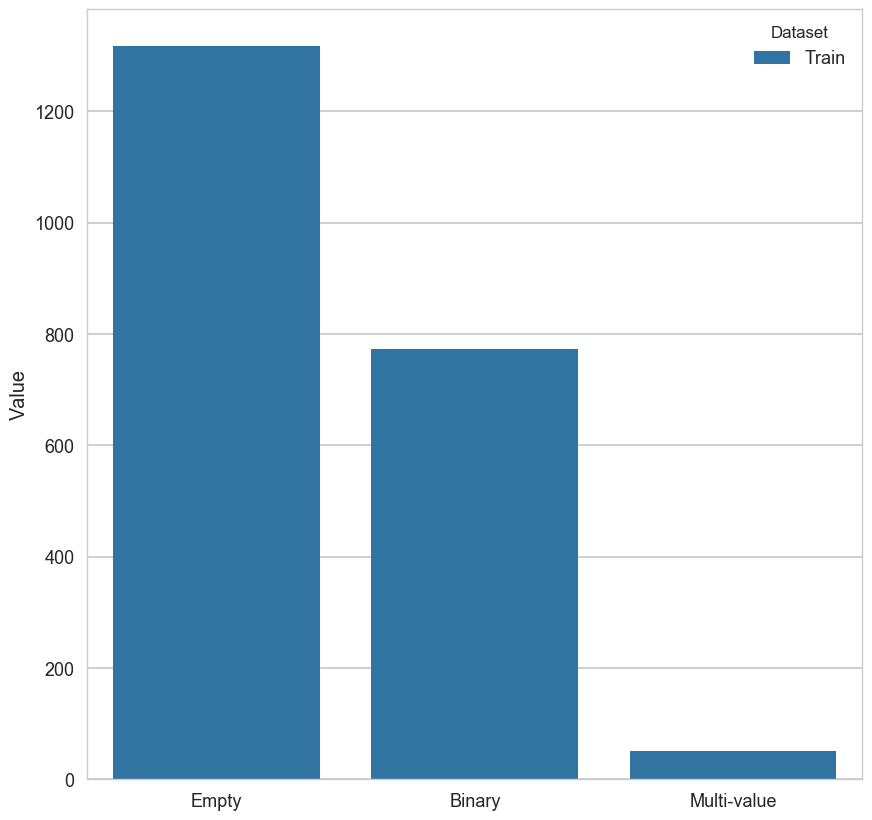

In [199]:
# Plotting number of empty, single, multi valued values present in the categorical features

fig = plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
sns.set_context("talk")
sns.barplot(y='Value', x='Type', hue='Dataset', data=pd.DataFrame([
    
    ['Train', 'Empty', len(emptyColumnsTrain)],
    ['Train', 'Binary', len(binaryColumnsTrain)],
    ['Train', 'Multi-value', len(multiColumnsTrain)]],
    columns=['Dataset', 'Type', 'Value'])).set(xlabel='', ylabel='Value')

In [200]:
# Number of null values present in the columns
train_categorical_df.isnull().sum(axis=0)

Id                        0
L0_S1_F25              9999
L0_S1_F27              9999
L0_S1_F29              9999
L0_S1_F31              9999
L0_S2_F33              9999
L0_S2_F35              9999
L0_S2_F37              9999
L0_S2_F39              9999
L0_S2_F41              9999
L0_S2_F43              9999
L0_S2_F45              9999
L0_S2_F47              9999
L0_S2_F49              9999
L0_S2_F51              9999
L0_S2_F53              9999
L0_S2_F55              9999
L0_S2_F57              9999
L0_S2_F59              9999
L0_S2_F61              9999
L0_S2_F63              9999
L0_S2_F65              9999
L0_S2_F67              9999
L0_S3_F69             10000
L0_S3_F71             10000
L0_S3_F73             10000
L0_S3_F75             10000
L0_S3_F77             10000
L0_S3_F79             10000
L0_S3_F81             10000
L0_S3_F83             10000
L0_S3_F85             10000
L0_S3_F87             10000
L0_S3_F89             10000
L0_S3_F91             10000
L0_S3_F93           

In [201]:
train_categorical_df.shape

(10000, 2142)

Dropping all the null columns from the Categorical Features

In [202]:
# dropping all the columns that have epmty sets
train_categorical_df_WN = train_categorical_df.dropna(how='all', axis=1)

In [203]:
# shape of the dataframe after dropping the empty columns
train_categorical_df_WN.shape

(10000, 825)


Since these are categorical features they have to be converted to numerical values and I used One Hot Encoding for this purpose.

One hot encoding: It is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction

### One hot encoding on the Categorical features

In [204]:
# Have to drop the response column from the categorical features
categorical_features = train_categorical_df_WN.drop(['NewColumn.Response'], axis = 1)

In [205]:
# One hot encoding of the categorical features
train_categorical_OHE = pd.get_dummies(categorical_features)

In [206]:
train_categorical_OHE

,Id,L0_S1_F25_T1,L0_S1_F27_T9,L0_S1_F29_T1,L0_S1_F31_T9,L0_S2_F33_T1,L0_S2_F35_T32,L0_S2_F37_T1,L0_S2_F39_T32,L0_S2_F41_T1,...,L3_S49_F4217_T1,L3_S49_F4220_T4,L3_S49_F4222_T1,L3_S49_F4225_T4,L3_S49_F4227_T1,L3_S49_F4230_T4,L3_S49_F4232_T1,L3_S49_F4235_T4,L3_S49_F4237_T1,L3_S49_F4240_T4
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
# shape of the resultant data frame
train_categorical_OHE.shape

(10000, 925)

After One hot encoding the number of features have increased from 825 - 925

### Numerical Features

In [208]:
# Importing a CSV file file of 10000 samples of numerical features with 9000 zeroes and 1000 ones
train_numeric_1k_n_9k_df = pd.read_csv('train_numerical_response_1k_n_9k.csv')

In [209]:
# dropping the response column from the numerical features 
train_numeric_1k_n_9k_features = train_numeric_1k_n_9k_df.drop(['Id','Response'], axis = 1)
train_numeric_1k_n_9k_features.head()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
0,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing Value Imputation

I have replaced all the Nans with 0's as it would be useful in further modelling

In [210]:
# Replacing all the missing values with 0
train_numeric_1k_n_9k_features_df = train_numeric_1k_n_9k_features.fillna(0)

In [211]:
train_numeric_1k_n_9k_features_df.shape

(10000, 968)

## Exploratory Analysis

In [212]:
train_numeric_df = pd.read_csv('train_numerical_response_1k_n_9k.csv')

In [213]:
train_numeric_df.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [214]:
# checking for number of positive response variables
train_numeric_df[train_numeric_df['Response'] ==0 ].shape

(9000, 970)

In [215]:
# checking for number of negative response variables
train_numeric_df[train_numeric_df['Response'] ==1 ].shape

(1000, 970)

### Number of non zero measurements in each station

In [216]:
# Number of stations in th production line
station_list = [(str('S') + str(i)) for i in range(51)]
station_list

['S0',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39',
 'S40',
 'S41',
 'S42',
 'S43',
 'S44',
 'S45',
 'S46',
 'S47',
 'S48',
 'S49',
 'S50']

In [217]:
# Number of features containing same station number
stations_count = []
for s in station_list:
    stations = []
    for e in train_numeric_df.columns:    
        if s == e[3:5] and e[5] == '_':
            stations.append(s)        
        if s == e[3:6]:
            stations.append(s)
    stations_count.append(stations)


In [218]:
stations_count

[['S0', 'S0', 'S0', 'S0', 'S0', 'S0', 'S0', 'S0', 'S0', 'S0', 'S0', 'S0'],
 ['S1', 'S1'],
 ['S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2'],
 ['S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3'],
 ['S4', 'S4'],
 ['S5', 'S5'],
 ['S6', 'S6', 'S6'],
 ['S7', 'S7', 'S7'],
 ['S8', 'S8', 'S8'],
 ['S9', 'S9', 'S9', 'S9', 'S9', 'S9', 'S9', 'S9', 'S9', 'S9', 'S9', 'S9'],
 ['S10',
  'S10',
  'S10',
  'S10',
  'S10',
  'S10',
  'S10',
  'S10',
  'S10',
  'S10',
  'S10',
  'S10'],
 ['S11',
  'S11',
  'S11',
  'S11',
  'S11',
  'S11',
  'S11',
  'S11',
  'S11',
  'S11',
  'S11',
  'S11'],
 ['S12',
  'S12',
  'S12',
  'S12',
  'S12',
  'S12',
  'S12',
  'S12',
  'S12',
  'S12',
  'S12',
  'S12'],
 ['S13', 'S13'],
 ['S14', 'S14', 'S14', 'S14', 'S14', 'S14', 'S14', 'S14', 'S14'],
 ['S15', 'S15', 'S15', 'S15', 'S15', 'S15', 'S15', 'S15', 'S15'],
 ['S16', 'S16'],
 ['S17', 'S17'],
 ['S18', 'S18', 'S18'],
 ['S19', 'S19', 'S19'],
 ['S20', 'S20', 'S20'],
 ['S21',
  'S21',
  'S21',
  'S21',
  'S21',
 

In [219]:
# count gives the count of station
count = []
for s in stations_count:
    count.append(len(s))

In [220]:
count

[12,
 2,
 9,
 9,
 2,
 2,
 3,
 3,
 3,
 12,
 12,
 12,
 12,
 2,
 9,
 9,
 2,
 2,
 3,
 3,
 3,
 14,
 14,
 14,
 229,
 284,
 14,
 14,
 14,
 53,
 68,
 4,
 1,
 10,
 4,
 8,
 8,
 4,
 3,
 4,
 8,
 14,
 0,
 8,
 8,
 5,
 0,
 11,
 6,
 7,
 7]

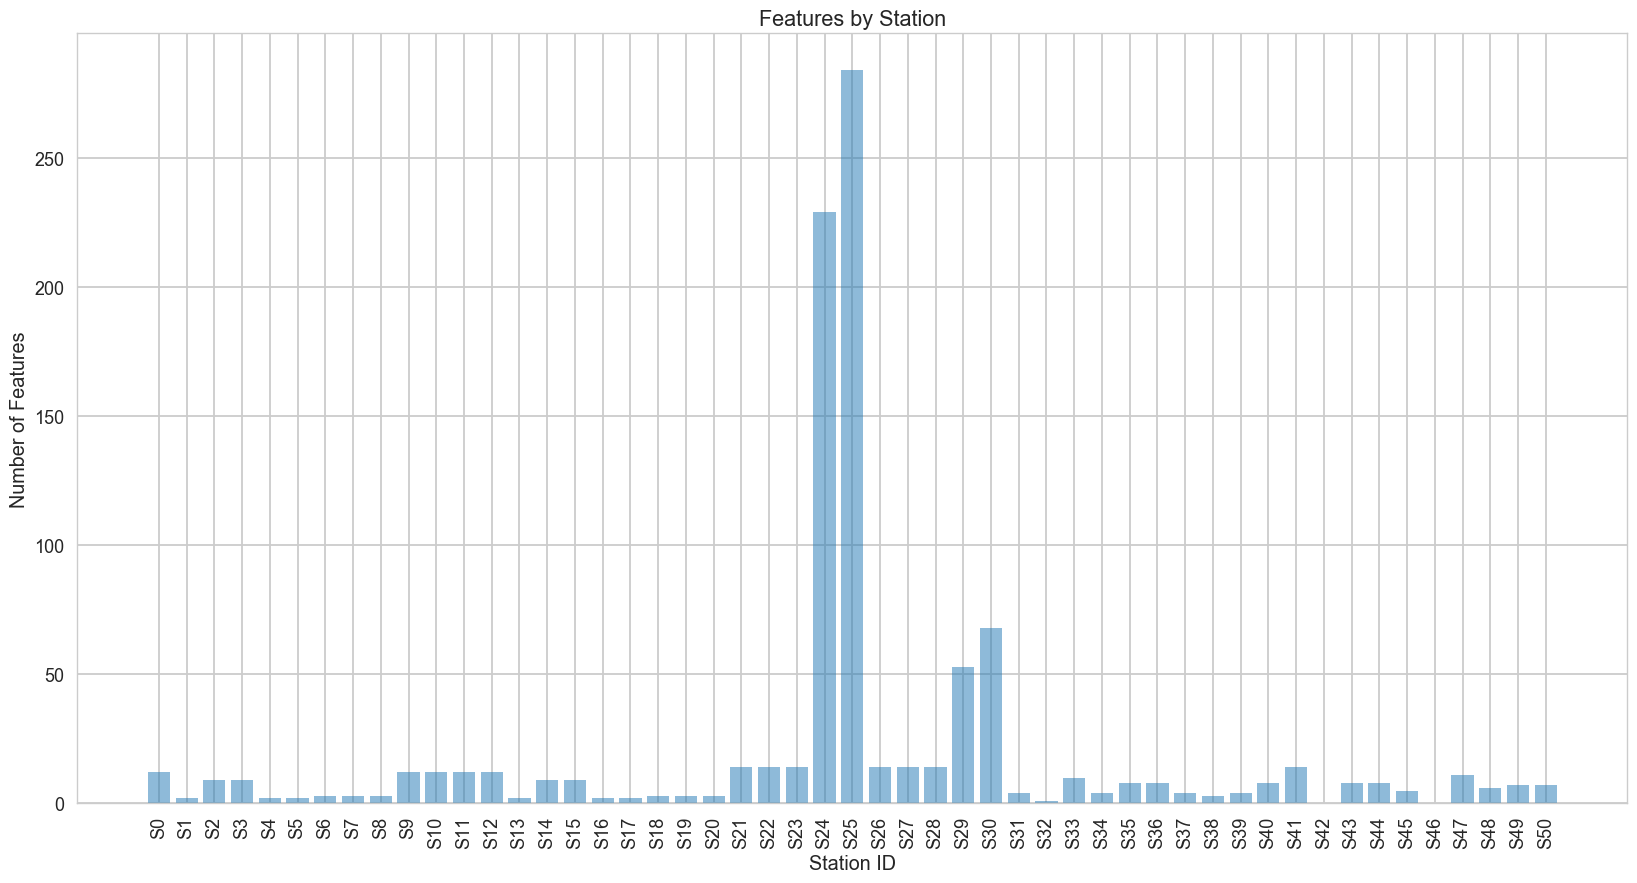

In [221]:
# Plot for number of non zero measurements

fig = plt.figure(figsize = (20,10))

x = station_list
y = count
 
plt.bar(x, y, align='center', alpha=0.5)

plt.ylabel('Number of Features')
plt.xlabel('Station ID')
plt.title('Features by Station')
plt.xticks(rotation=90)
 
plt.show()

We can observe from the above plot that there exists 51 stations distributed between 4 production lines. Counting the total number of non-zero measurements in each station we see tha station 24 and 25 have the most number of measurements and station 32 has only 1 measurement and remaining stations have about 20 measurements

###  Number of products parts passing through each station

In [222]:
# Number of products per each station
parts_per_feature = train_numeric_df.drop(['Id'], axis = 1).count()

In [223]:
# Converting data frame to a list
products_per_station = parts_per_feature.tolist()

In [224]:
products_per_station

[5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 5680,
 2846,
 2846,
 2846,
 2846,
 2846,
 2846,
 2846,
 2846,
 2846,
 2840,
 2840,
 2840,
 2840,
 2840,
 2840,
 2840,
 2840,
 2840,
 2825,
 2824,
 2865,
 2865,
 2837,
 2837,
 2837,
 2851,
 2851,
 2851,
 5677,
 5677,
 5677,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1878,
 1878,
 1878,
 1878,
 1878,
 1878,
 1878,
 1878,
 1878,
 1878,
 1878,
 1878,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 2060,
 1025,
 1025,
 1025,
 1025,
 1025,
 1025,
 1025,
 1025,
 1025,
 1034,
 1034,
 1034,
 1034,
 1034,
 1034,
 1034,
 1034,
 1034,
 1023,
 1023,
 1038,
 1038,
 985,
 985,
 985,
 1075,
 1075,
 1075,
 2060,
 2060,
 2060,
 699,
 700,
 699,
 700,
 699,
 699,
 699,
 699,
 699,
 699,
 699,
 699,
 699,
 699,
 671,
 671,
 671,
 671,
 671,
 671,
 

In [225]:
# columns present in the numerical features
df1 = train_numeric_df.drop(['Id'], axis =1).columns

In [226]:
# Converting the above data frame into a list
columns_list = df1.tolist()

In [227]:
columns_list

['L0_S0_F0',
 'L0_S0_F2',
 'L0_S0_F4',
 'L0_S0_F6',
 'L0_S0_F8',
 'L0_S0_F10',
 'L0_S0_F12',
 'L0_S0_F14',
 'L0_S0_F16',
 'L0_S0_F18',
 'L0_S0_F20',
 'L0_S0_F22',
 'L0_S1_F24',
 'L0_S1_F28',
 'L0_S2_F32',
 'L0_S2_F36',
 'L0_S2_F40',
 'L0_S2_F44',
 'L0_S2_F48',
 'L0_S2_F52',
 'L0_S2_F56',
 'L0_S2_F60',
 'L0_S2_F64',
 'L0_S3_F68',
 'L0_S3_F72',
 'L0_S3_F76',
 'L0_S3_F80',
 'L0_S3_F84',
 'L0_S3_F88',
 'L0_S3_F92',
 'L0_S3_F96',
 'L0_S3_F100',
 'L0_S4_F104',
 'L0_S4_F109',
 'L0_S5_F114',
 'L0_S5_F116',
 'L0_S6_F118',
 'L0_S6_F122',
 'L0_S6_F132',
 'L0_S7_F136',
 'L0_S7_F138',
 'L0_S7_F142',
 'L0_S8_F144',
 'L0_S8_F146',
 'L0_S8_F149',
 'L0_S9_F155',
 'L0_S9_F160',
 'L0_S9_F165',
 'L0_S9_F170',
 'L0_S9_F175',
 'L0_S9_F180',
 'L0_S9_F185',
 'L0_S9_F190',
 'L0_S9_F195',
 'L0_S9_F200',
 'L0_S9_F205',
 'L0_S9_F210',
 'L0_S10_F219',
 'L0_S10_F224',
 'L0_S10_F229',
 'L0_S10_F234',
 'L0_S10_F239',
 'L0_S10_F244',
 'L0_S10_F249',
 'L0_S10_F254',
 'L0_S10_F259',
 'L0_S10_F264',
 'L0_S10_F269',
 'L0_

In [228]:
# Creating a dictionary to relate number of products for each column (feature)
engwise=dict()
for e in station_list:
    for c,b in enumerate(columns_list):
        if b[3:5] == e and b[5] == '_':
            engwise[b] = products_per_station[c]
        if b[3:6] == e:    
            engwise[b] = products_per_station[c]

In [229]:
engwise

{'L0_S0_F0': 5680,
 'L0_S0_F2': 5680,
 'L0_S0_F4': 5680,
 'L0_S0_F6': 5680,
 'L0_S0_F8': 5680,
 'L0_S0_F10': 5680,
 'L0_S0_F12': 5680,
 'L0_S0_F14': 5680,
 'L0_S0_F16': 5680,
 'L0_S0_F18': 5680,
 'L0_S0_F20': 5680,
 'L0_S0_F22': 5680,
 'L0_S1_F24': 5680,
 'L0_S1_F28': 5680,
 'L0_S2_F32': 2846,
 'L0_S2_F36': 2846,
 'L0_S2_F40': 2846,
 'L0_S2_F44': 2846,
 'L0_S2_F48': 2846,
 'L0_S2_F52': 2846,
 'L0_S2_F56': 2846,
 'L0_S2_F60': 2846,
 'L0_S2_F64': 2846,
 'L0_S3_F68': 2840,
 'L0_S3_F72': 2840,
 'L0_S3_F76': 2840,
 'L0_S3_F80': 2840,
 'L0_S3_F84': 2840,
 'L0_S3_F88': 2840,
 'L0_S3_F92': 2840,
 'L0_S3_F96': 2840,
 'L0_S3_F100': 2840,
 'L0_S4_F104': 2825,
 'L0_S4_F109': 2824,
 'L0_S5_F114': 2865,
 'L0_S5_F116': 2865,
 'L0_S6_F118': 2837,
 'L0_S6_F122': 2837,
 'L0_S6_F132': 2837,
 'L0_S7_F136': 2851,
 'L0_S7_F138': 2851,
 'L0_S7_F142': 2851,
 'L0_S8_F144': 5677,
 'L0_S8_F146': 5677,
 'L0_S8_F149': 5677,
 'L0_S9_F155': 1895,
 'L0_S9_F160': 1895,
 'L0_S9_F165': 1895,
 'L0_S9_F170': 1895,
 'L0_S9

In [230]:
# Creating a list of list to give number of products per each station
agg_sum_columns=[]
x=0
for x in range(51):    
    current_name = station_list[x]
    agg_sum = []
    for i in range(len(engwise)):
        a = 0
        if(columns_list[i][3:5]==current_name and columns_list[i][5] == '_'):
            a = a + engwise[columns_list[i]]
            agg_sum.append(a)
        if(columns_list[i][3:6]==current_name):
            a = a + engwise[columns_list[i]]
            agg_sum.append(a)
    agg_sum_columns.append(agg_sum)


In [231]:
agg_sum_columns

[[5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680],
 [5680, 5680],
 [2846, 2846, 2846, 2846, 2846, 2846, 2846, 2846, 2846],
 [2840, 2840, 2840, 2840, 2840, 2840, 2840, 2840, 2840],
 [2825, 2824],
 [2865, 2865],
 [2837, 2837, 2837],
 [2851, 2851, 2851],
 [5677, 5677, 5677],
 [1895, 1895, 1895, 1895, 1895, 1895, 1895, 1895, 1895, 1895, 1895, 1895],
 [1921, 1921, 1921, 1921, 1921, 1921, 1921, 1921, 1921, 1921, 1921, 1921],
 [1878, 1878, 1878, 1878, 1878, 1878, 1878, 1878, 1878, 1878, 1878, 1878],
 [2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060, 2060],
 [2060, 2060],
 [1025, 1025, 1025, 1025, 1025, 1025, 1025, 1025, 1025],
 [1034, 1034, 1034, 1034, 1034, 1034, 1034, 1034, 1034],
 [1023, 1023],
 [1038, 1038],
 [985, 985, 985],
 [1075, 1075, 1075],
 [2060, 2060, 2060],
 [699, 700, 699, 700, 699, 699, 699, 699, 699, 699, 699, 699, 699, 699],
 [671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671],
 [692, 692, 692, 692, 692, 692, 692, 6

In [232]:
#Summing all the product count for each station
parts_per_station = []
for i in agg_sum_columns:
    parts_per_station.append(sum(i))

In [233]:
parts_per_station

[68160,
 11360,
 25614,
 25560,
 5649,
 5730,
 8511,
 8553,
 17031,
 22740,
 23052,
 22536,
 24720,
 4120,
 9225,
 9306,
 2046,
 2076,
 2955,
 3225,
 6180,
 9788,
 9394,
 9688,
 81007,
 29036,
 26894,
 14308,
 924,
 500121,
 557432,
 1220,
 325,
 92720,
 37188,
 37196,
 38592,
 37868,
 708,
 2028,
 4064,
 7112,
 0,
 2224,
 1904,
 2540,
 0,
 5588,
 3042,
 1760,
 1806]

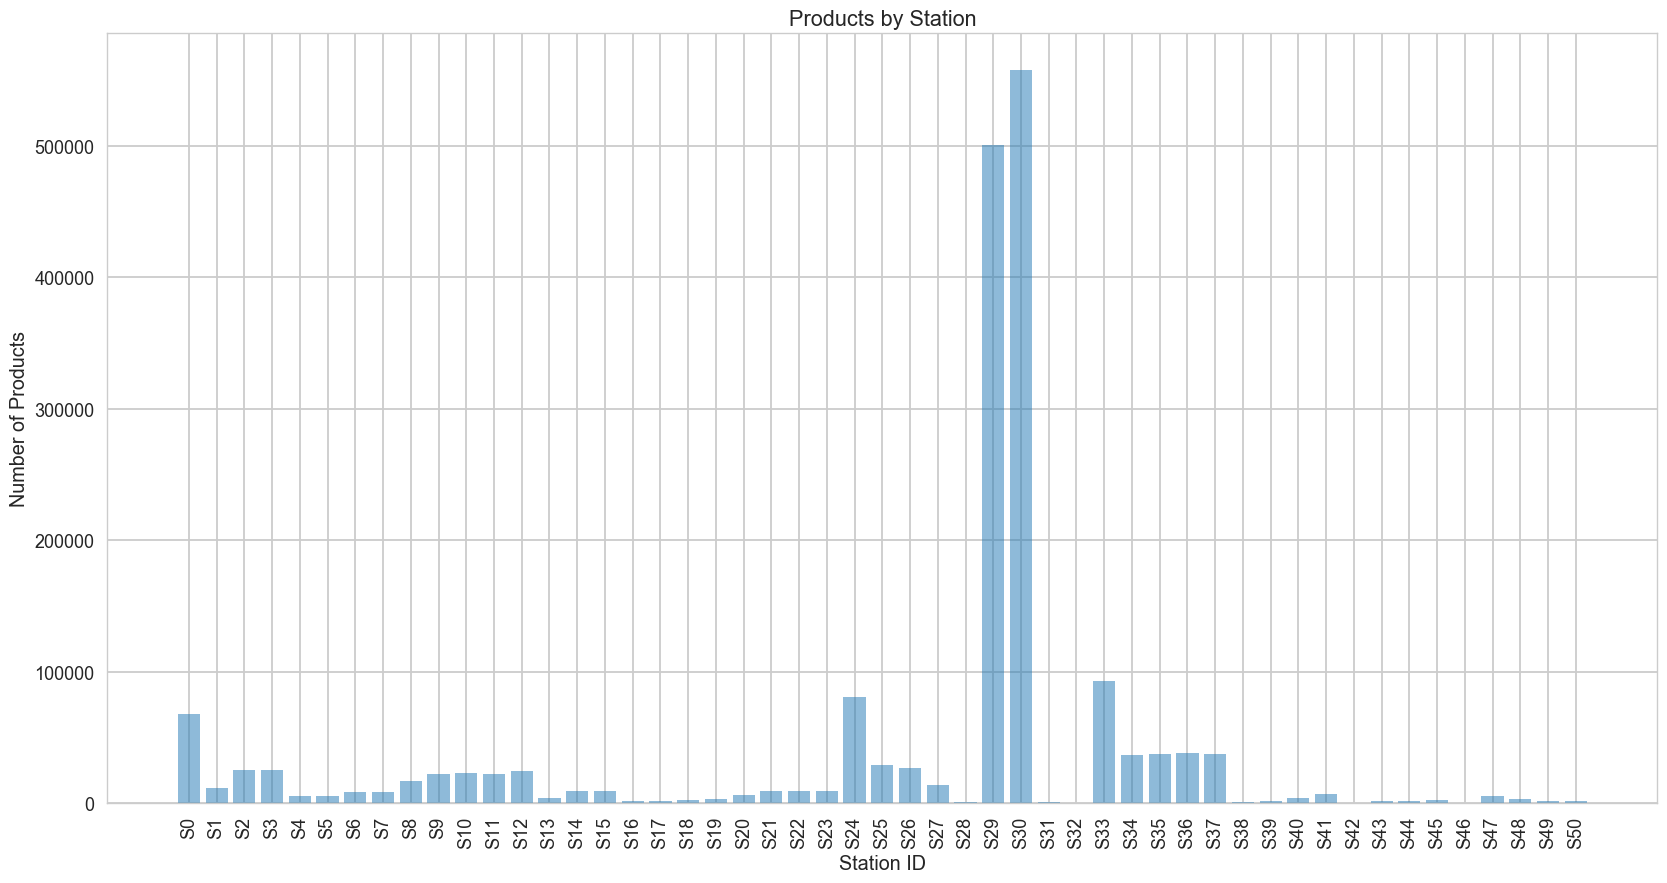

In [234]:
# Plot for number of product parts passing through each station

fig = plt.figure(figsize = (20,10))

x = station_list
y = parts_per_station
 
plt.bar(x, y, align='center', alpha=0.5)

plt.ylabel('Number of Products')
plt.xlabel('Station ID')
plt.title('Products by Station')
plt.xticks(rotation=90)
 
plt.show()

To understand how parts are moving through the station, a count of number of parts per station is plotted in the above figure. We observe that each station has different number of parts passing through it, which could mean the existence of different classes of products, each going through a certain production path. Also station 32 has very few parts going through it, which means it doesnot process many parts. This indicates that station 32 is some sort of a reprocessing or post procesing station

#### Now we have to join both the categorical and numerical features

In [235]:
# Now we have to add both the categorical and numerical features
frames = [train_numeric_1k_n_9k_features_df, train_categorical_OHE]
features_dataframe = pd.concat(frames, axis = 1)
features_df = features_dataframe.drop(['Id'], axis = 1)

In [236]:
features_df.shape

(10000, 1892)

### Feature Selection Technique

Feature selection is also called variable selection or attribute selection. It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection can be used for the following reasons:(From Wiki)
1. Simplification of models to make them easier to interpret by researchers/users
2. Shorter training times
3. To avoid the curse of dimensionality,
4. Enhanced generalization by reducing overfitting (formally, reduction of variance)

I have  picked the categorical and numerical features from the data set  and then I created a dataframe with 1892 features. Then I used Random Forest Regressor Technique to generate the feature importance and then I have removed those features which aren't significant to predict the salary. Finally I have selected 300 features.

Random Forest classifier: A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size. I have used feature_importaces_ as my metric.

In [237]:
# Using Random Forest Regressor for feature selection 
    
X = features_df
y = train_numeric_1k_n_9k_df['Response']

rfr = RandomForestClassifier(bootstrap=True)      
rfr = rfr.fit(X, y)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
col = pd.Series(X.columns)
indices = np.argsort(importances)[::-1]
indices_no = []
importances_values= []
feature_names = []

for f in range(X.shape[1]):
    indices_no.append(f+1)
    feature_names.append(col[indices[f]])
    importances_values.append(importances[indices[f]])
    print( (f + 1, indices[f], col[indices[f]], importances[indices[f]]))
    

(1, 1829, 'L3_S32_F3854_T2', 0.02798897413638405)
(2, 1821, 'L3_S32_F3851_T1', 0.014398420410123524)
(3, 848, 'L3_S32_F3850', 0.012245675555429894)
(4, 854, 'L3_S33_F3865', 0.007779641891494246)
(5, 850, 'L3_S33_F3857', 0.007089510736932055)
(6, 760, 'L3_S29_F3442', 0.0065624547223262055)
(7, 832, 'L3_S30_F3774', 0.006248739482653095)
(8, 728, 'L3_S29_F3330', 0.006056021211613213)
(9, 851, 'L3_S33_F3859', 0.005938830042274718)
(10, 777, 'L3_S30_F3499', 0.005903367717428086)
(11, 1831, 'L3_S32_F3854_T4', 0.0058831860812999254)
(12, 828, 'L3_S30_F3754', 0.005851269928278108)
(13, 392, 'L1_S24_F1842', 0.005842790751523842)
(14, 394, 'L1_S24_F1846', 0.00582831302744049)
(15, 803, 'L3_S30_F3629', 0.005762068328732863)
(16, 11, 'L0_S0_F22', 0.005729032607671386)
(17, 345, 'L1_S24_F1632', 0.005547841923504363)
(18, 827, 'L3_S30_F3749', 0.005430519881810057)
(19, 733, 'L3_S29_F3345', 0.005385912363183509)
(20, 764, 'L3_S29_F3458', 0.005309733665041009)
(21, 841, 'L3_S30_F3819', 0.0052864855579

In [238]:
# Creating a dataframe for the features and their importances and finding a cumulative sum of the importances

# converting lists into array
i_c = np.array(importances_values) 
features = np.array(feature_names)
df_indices_n_importances = pd.DataFrame({'indices_no': indices, 'features_names':features,'importances_values':importances_values})
result = df_indices_n_importances.sort_values(['importances_values'], ascending= False)
result['importances_cumulative_sum'] = result.importances_values.cumsum()


In [239]:
pd.set_option('display.max_rows', 1000) # to view 500 rows of the dataframe
result

,indices_no,features_names,importances_values,importances_cumulative_sum
0,1829,L3_S32_F3854_T2,0.027989,0.027989
1,1821,L3_S32_F3851_T1,0.014398,0.042387
2,848,L3_S32_F3850,0.012246,0.054633
3,854,L3_S33_F3865,0.007780,0.062413
4,850,L3_S33_F3857,0.007090,0.069502
5,760,L3_S29_F3442,0.006562,0.076065
6,832,L3_S30_F3774,0.006249,0.082313
7,728,L3_S29_F3330,0.006056,0.088369
8,851,L3_S33_F3859,0.005939,0.094308
9,777,L3_S30_F3499,0.005903,0.100212


### Top 10 significant features

In [240]:
result['features_names'][0:10]

0    L3_S32_F3854_T2
1    L3_S32_F3851_T1
2       L3_S32_F3850
3       L3_S33_F3865
4       L3_S33_F3857
5       L3_S29_F3442
6       L3_S30_F3774
7       L3_S29_F3330
8       L3_S33_F3859
9       L3_S30_F3499
Name: features_names, dtype: object

From the above features we can infer that production line 3 features are most important features 

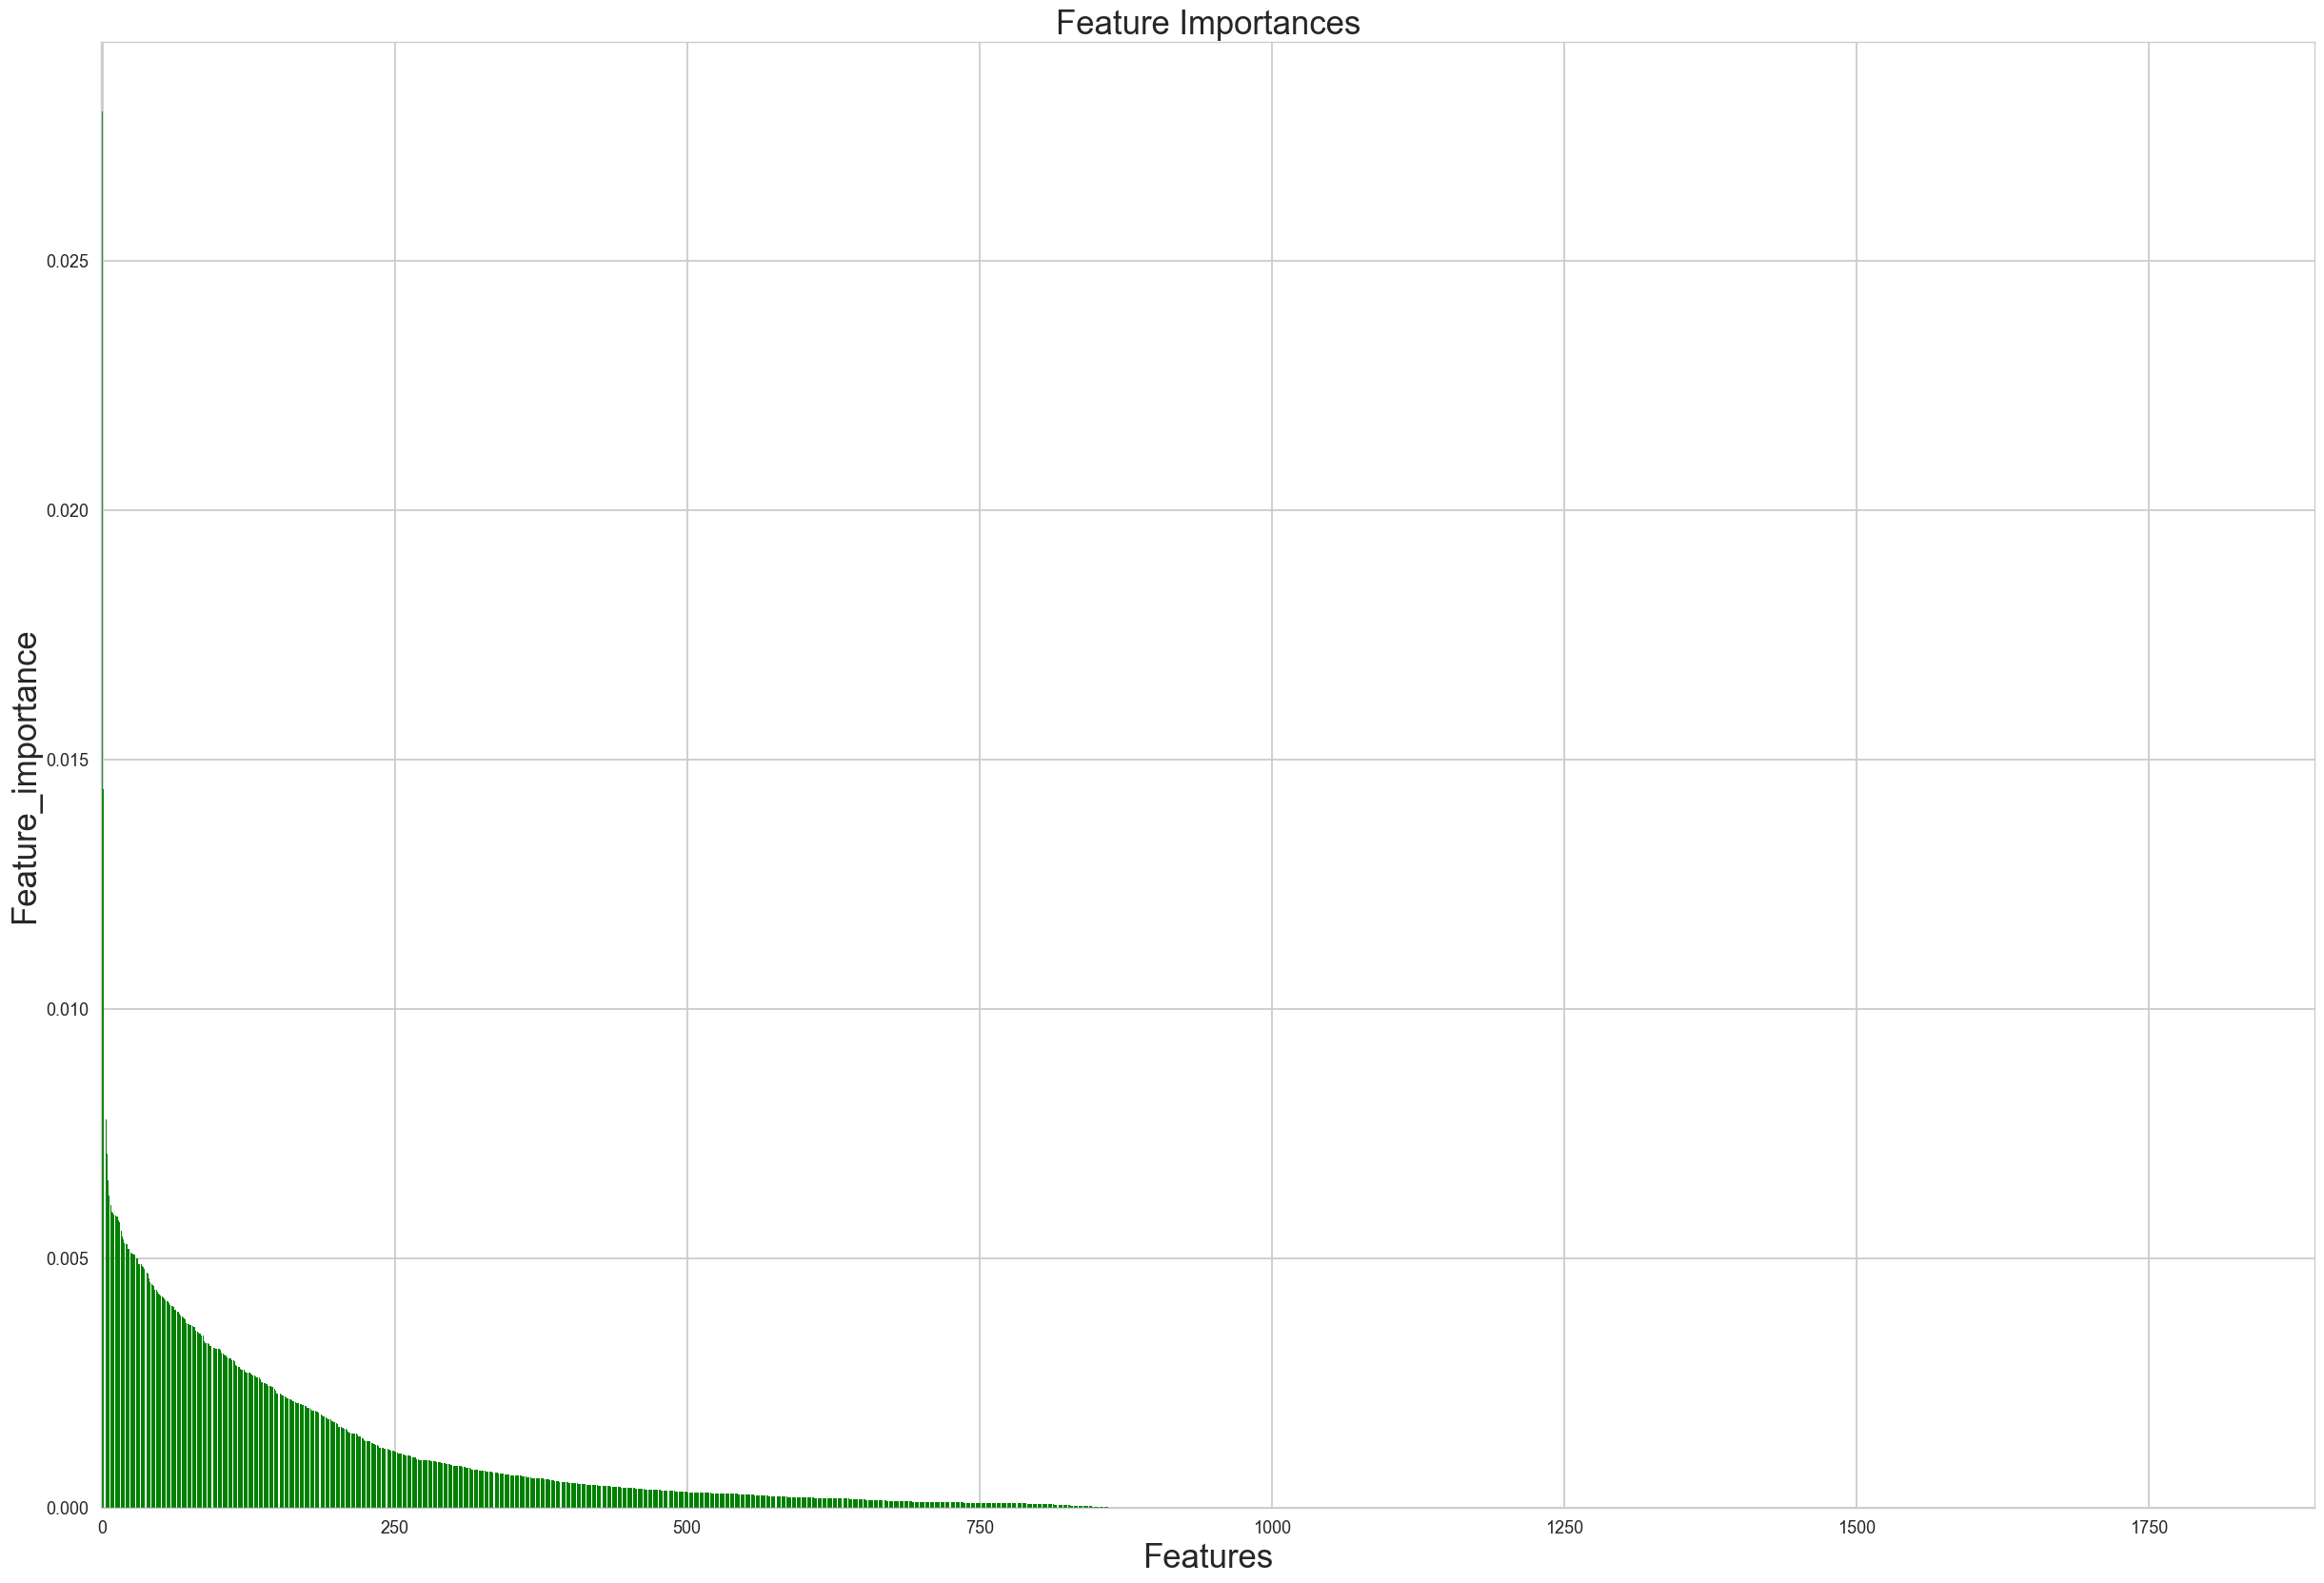

In [241]:
# Plot the feature importances of the random forest regressor 

features_selected = result['features_names']
feature_importance = result['importances_values']

plt.figure(1, figsize=(30, 20))
plt.title("Feature Importances", fontsize = 25)
plt.xlabel('Features', fontsize = 25)
plt.ylabel('Feature_importance', fontsize = 25)
plt.bar(range(X.shape[1]), importances[indices], color="g", align="center")
# plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Text(0.5,1,' Feature_importance dependency on number of features')

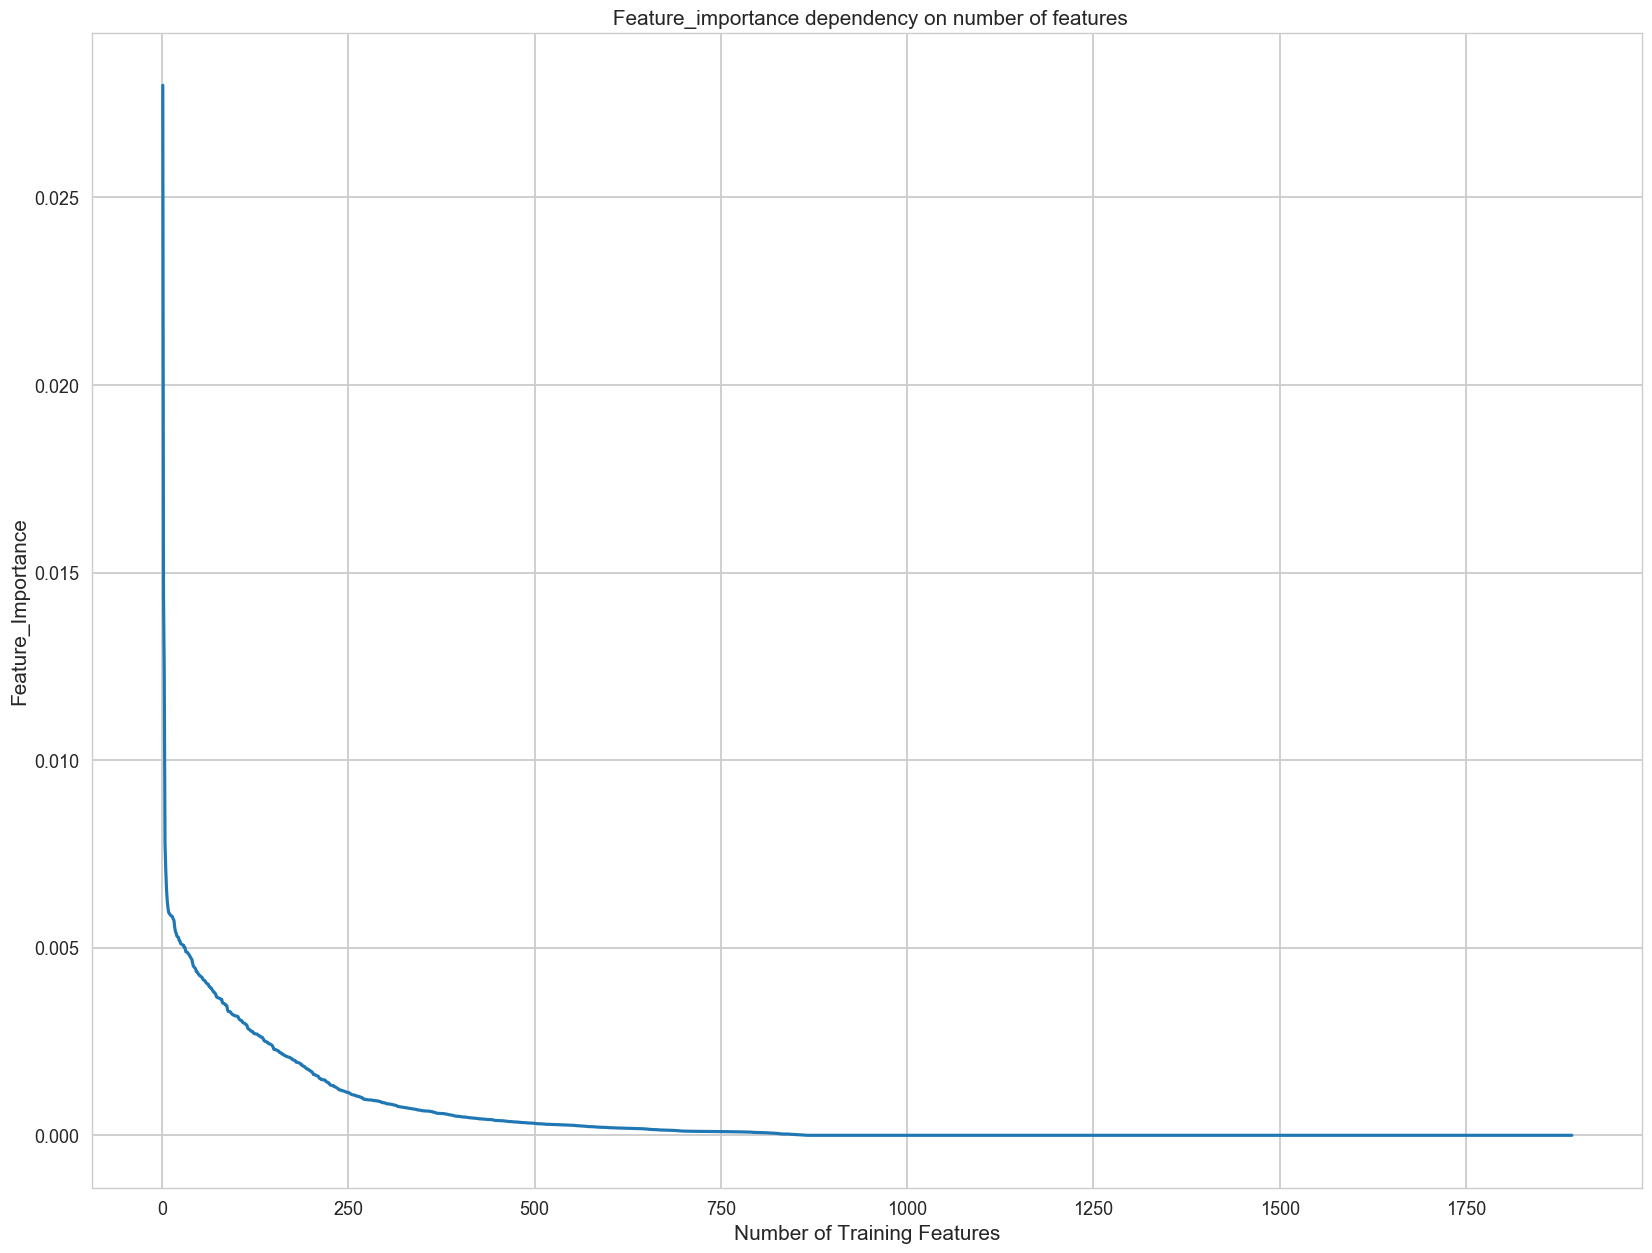

In [242]:
# Plotting Feature importance with respect to number of features

x = np.linspace(1,1892,1892)
plt.figure(1, figsize=(20, 15))
y = result['importances_values']
ax = plt.plot(x, y, '-')
plt.xlabel('Number of Training Features', fontsize = 15)
plt.ylabel('Feature_Importance', fontsize = 15)
plt.title(' Feature_importance dependency on number of features',fontsize = 15)


From the above graph it can be seen that the feature importance becomes almost zero(0.000) at 500 features but from 300 features to 500 features the difference of the feature importance is very minute which means these features are more like a noise in the model and if they are included in the model they increase the complexity of the model and further the variance of the model. So I have selected 300 features for modelling. 

In [243]:
# selecting optimized features
features_selected = result['features_names'][0:300]

In [244]:
features_df[features_selected]

,L3_S32_F3854_T2,L3_S32_F3851_T1,L3_S32_F3850,L3_S33_F3865,L3_S33_F3857,L3_S29_F3442,L3_S30_F3774,L3_S29_F3330,L3_S33_F3859,L3_S30_F3499,...,L3_S47_F4163,L0_S22_F606,L3_S29_F3464,L0_S21_F487,L3_S29_F3444_T1,L1_S24_F1118,L0_S2_F32,L0_S15_F415,L1_S24_F1816,L1_S24_F1798
0,0,0,0.000,0.026,-0.102,-0.067,0.038,-0.058,-0.048,0.003,...,0.000,0.000,0.52,0.000,0,0.000,-0.213,0.000,0.000,0.000
1,0,0,0.000,-0.047,-0.026,0.145,-0.036,0.152,-0.210,-0.008,...,0.000,0.000,-0.48,-0.003,0,0.000,0.000,0.000,0.000,0.000
2,0,0,0.000,0.108,0.191,0.014,0.119,0.004,0.236,-0.009,...,0.000,0.000,-0.48,0.000,1,0.000,-0.013,0.000,0.000,0.000
3,0,0,0.000,0.035,0.031,0.024,0.028,0.025,0.165,0.014,...,0.000,0.000,-0.48,0.000,1,0.000,-0.013,0.000,0.000,0.000
4,0,0,0.000,-0.006,-0.049,-0.049,0.056,-0.063,0.147,-0.004,...,0.000,0.000,0.52,0.000,1,0.000,0.000,0.000,0.000,0.000
5,0,0,0.000,-0.055,0.007,0.116,0.030,0.139,-0.221,0.005,...,0.000,0.000,-0.48,0.000,1,0.000,0.000,0.000,0.000,0.000
6,0,0,0.000,-0.055,-0.001,-0.052,-0.022,-0.061,-0.112,0.002,...,0.000,-0.001,-0.48,0.000,1,0.000,0.000,-0.175,0.000,0.000
7,0,0,0.000,-0.006,-0.193,-0.021,-0.020,-0.012,0.004,-0.008,...,0.000,0.000,0.52,0.000,1,0.000,0.000,0.000,0.065,0.000
8,0,0,0.000,0.010,-0.006,-0.088,-0.024,-0.095,-0.035,0.002,...,0.000,0.000,0.52,0.000,1,0.000,-0.013,0.000,0.000,0.000
9,0,0,0.000,0.018,0.129,-0.057,0.037,-0.036,0.047,0.004,...,0.000,0.000,0.52,0.090,1,0.000,0.000,0.000,0.000,0.000


### Checking the accuracy of the model for both categorical and numerical features with feature reduction 

In [245]:
# Assigning the X and y values
X = features_dataframe[features_selected]
y = train_numeric_1k_n_9k_df['Response']

# Splitting the dataset into training/testing set and stratifying the traing and testing responses
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)


In [246]:
# training data classes proportion
y_1 = y_train.tolist()
Class_Proportion = (y_1.count(0))/(y_1.count(1))
Class_Proportion

9.0

In [247]:
# testing data classes proportion
y_2 = y_test.tolist()
Class_Proportion = (y_2.count(0))/(y_2.count(1))
Class_Proportion

9.0

### Let’s first fit the following classifiers with default parameters to get a baseline idea of the performance

### Logistic Regression Algorithm

In [248]:
model = LogisticRegression()
model_n = model.fit(X_train,y_train) # Training the model
model_scores = cross_val_score(model, X, y, cv=10)
model_cv_mean_LR = np.mean(model_scores) # gives the mean score of all folds
print('model Mean score : ', model_cv_mean_LR)
y_predict_LR = model.predict(X_test) # Predicting the test data
print(classification_report(y_test,y_predict_LR))
MCC_LR = matthews_corrcoef(y_test,y_predict_LR )


model Mean score :  0.9144000000000002
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2700
          1       0.84      0.16      0.27       300

avg / total       0.91      0.91      0.89      3000



### Random Forest Classifier Algorithm

In [249]:
model = RandomForestClassifier()
model_n = model.fit(X_train,y_train) # Training the model
model_scores = cross_val_score(model, X, y, cv=10)
model_cv_mean_RFC = np.mean(model_scores) # gives the mean score of all folds
print('model Mean score : ', model_cv_mean_RFC)
y_predict_RFC = model.predict(X_test) # Predicting the test data
print(classification_report(y_test,y_predict_RFC))
MCC_RFC = matthews_corrcoef(y_test,y_predict_RFC)

model Mean score :  0.9116
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      2700
          1       0.75      0.21      0.32       300

avg / total       0.90      0.91      0.89      3000



### Gardien Boosting ClassifierAlgorithm

In [250]:
model = GradientBoostingClassifier()
model_n = model.fit(X_train,y_train) # Training the model
model_scores = cross_val_score(model, X, y, cv=10)
model_cv_mean_GBC = np.mean(model_scores) # gives the mean score of all folds
print('model Mean score : ', model_cv_mean_GBC)
y_predict_GBC = model.predict(X_test) # Predicting the test data
print(classification_report(y_test,y_predict_GBC))
MCC_GBC = matthews_corrcoef(y_test,y_predict_GBC )

model Mean score :  0.9161000000000001
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      2700
          1       0.78      0.19      0.30       300

avg / total       0.90      0.91      0.89      3000



In [251]:
# Overall models performance
algorithms = { }
algorithms['Classifier'] = ['Logistic Regeression','Random Forest Classifier', 'Gradient Boosting Classifier']
algorithms['mean'] = [model_cv_mean_LR, model_cv_mean_RFC,model_cv_mean_GBC ]
algorithms['Recall'] = [0.91,  0.91, 0.92]
algorithms['Mathews Correlation Coefficient'] = [MCC_LR,MCC_RFC,MCC_GBC]
algorithms = pd.DataFrame(algorithms)
algorithms

,Classifier,mean,Recall,Mathews Correlation Coefficient
0,Logistic Regeression,0.9144,0.91,0.344260
1,Random Forest Classifier,0.9116,0.91,0.363786
2,Gradient Boosting Classifier,0.9161,0.92,0.354280


From all the results above it can be inferred that Gradient Boosting performs well when compared to other algorithms. The reasons could be: since this is a non linear algorithm which works very well with numerical features and require less  feature engineering and hyper parameter tuning, which makes it simple to implement in this case.

### Now let's do  hyperparameter tuning on the Logistic Regression, Random Forest and Gradient Boosting Classifier for different parameters and manually optimize them

## Hyperparameter Tuning

![image](https://cdn-images-1.medium.com/max/1600/1*pgTLoLGw0PVaP7ViSyQabA.png)

### Plotting validation curves for different models for various parameters and optimizing them

I have plotted validations curves training data and validation data with a 3 fold Cross Validation and found the optimal hyper parameters and then used these parameters in running the 3 classifiers on testing data and tabulated the results accordingly

### Logistic Regression

Using l2 regularization and optimizing C_values

In [252]:
# Construct the validation curve with estimator Logistic Regression with l2 penalty
from sklearn.model_selection import validation_curve
param_range =np.array([0.001, 0.01, 0.1, 1,10, 100])  # The different parameter values to try

train_scores, cv_scores = validation_curve(LogisticRegression(penalty = "l2"),  X_train, y_train, 
                                           param_name="C", param_range=param_range, 
                                           scoring="accuracy")

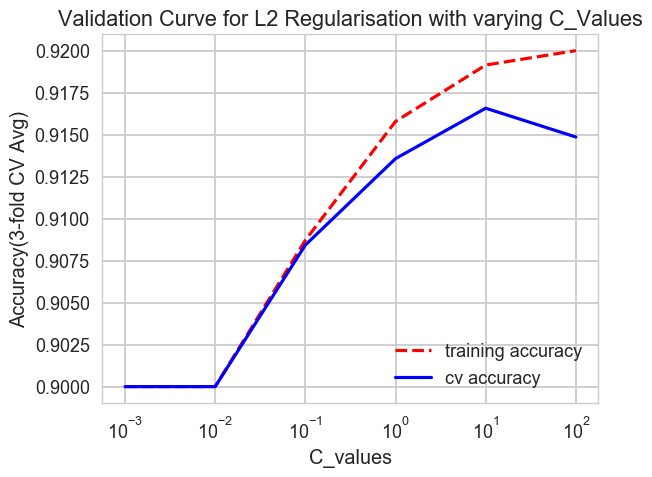

In [253]:
# Measuring the training and cross validation accuracies
tr_acc = np.mean(train_scores, axis=1)
cv_acc = np.mean(cv_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(param_range, tr_acc, linestyle="--", color="r", label="training accuracy")
ax.plot(param_range, cv_acc, linestyle="-", color="b", label="cv accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy(3-fold CV Avg)')
plt.title('Validation Curve for L2 Regularisation with varying C_Values')
ax.set_xscale("log")
ax.legend(loc="lower right")

In [254]:
# gives us the maximum C_value where cv_acc was maximum
param_range[np.argmax(cv_acc)]

10.0

In [255]:
# evaluating the model on testing data
model = LogisticRegression(penalty='l2',C=10)
model.fit(X_train,y_train) # Training the model
y_predict_LR_HP_l2 = model.predict(X_test) # Predicting the test data
score_LogR_HP = accuracy_score(y_test,y_predict_LR_HP_l2)
print(score_LogR_HP)
print(classification_report(y_test,y_predict_LR_HP_l2))
MCC_LogR_HP = matthews_corrcoef(y_test,y_predict_LR_HP_l2 )

0.9153333333333333
             precision    recall  f1-score   support

          0       0.92      1.00      0.95      2700
          1       0.84      0.19      0.31       300

avg / total       0.91      0.92      0.89      3000



Using l1 regularization and optimizing C_values

In [256]:
# Construct the validation curve with estimator Logistic Regression with l2 penalty
from sklearn.model_selection import validation_curve
param_range =np.array([0.001, 0.01, 0.1, 1,10, 100])  # The different parameter values to try

train_scores, cv_scores = validation_curve(LogisticRegression(penalty = "l1"),  X_train, y_train, 
                                           param_name="C", param_range=param_range, 
                                           scoring="accuracy")

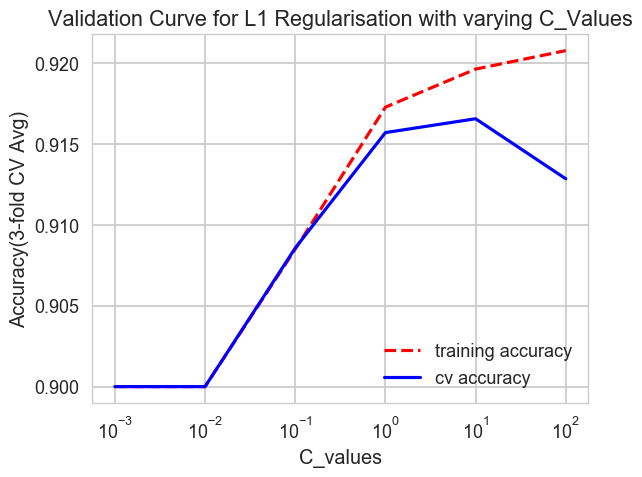

In [257]:
# Measuring the training and cross validation accuracies
tr_acc = np.mean(train_scores, axis=1)
cv_acc = np.mean(cv_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(param_range, tr_acc, linestyle="--", color="r", label="training accuracy")
ax.plot(param_range, cv_acc, linestyle="-", color="b", label="cv accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy(3-fold CV Avg)')
plt.title('Validation Curve for L1 Regularisation with varying C_Values')
ax.set_xscale("log")
ax.legend(loc="lower right")

In [258]:
# gives us the maximum C_value where cv_acc was maximum
param_range[np.argmax(cv_acc)]

10.0

In [259]:
# evaluating the model on testing data
model = LogisticRegression(penalty='l1',C=1)
model.fit(X_train,y_train) # Training the model
y_predict_LR_HP_l1 = model.predict(X_test) # Predicting the test data
score_LogR = accuracy_score(y_test,y_predict_LR_HP_l1)
print(score_LogR)
print(classification_report(y_test,y_predict_LR_HP_l1))
MCC_LogR = matthews_corrcoef(y_test,y_predict_LR_HP_l1 )

0.9146666666666666
             precision    recall  f1-score   support

          0       0.92      1.00      0.95      2700
          1       0.83      0.18      0.30       300

avg / total       0.91      0.91      0.89      3000



### Random Forest Classifier

In [260]:
# Construct the validation curve with estimator Random Forest Classifier with varying max_depth parameter
from sklearn.model_selection import validation_curve
param_range_rfc =np.array(list(range(1,32,1))) # The different parameter values to try

train_scores, cv_scores = validation_curve(RandomForestClassifier(n_estimators=100),  X_train, y_train, 
                                           param_name="max_depth", param_range=param_range_rfc, 
                                           scoring="accuracy")

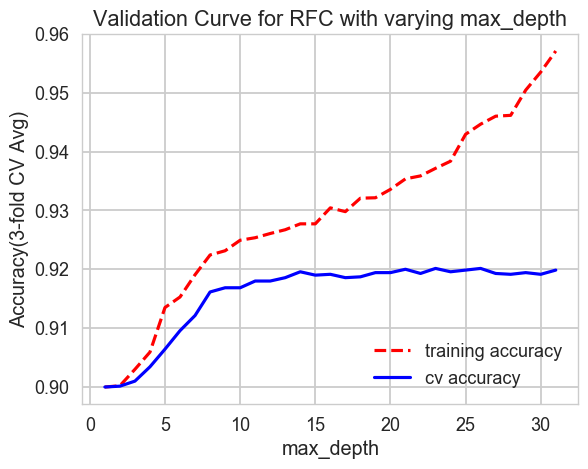

In [261]:
# Measuring the training and cross validation accuracies
tr_acc = np.mean(train_scores, axis=1)
cv_acc = np.mean(cv_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(param_range_rfc, tr_acc, linestyle="--", color="r", label="training accuracy")
ax.plot(param_range_rfc, cv_acc, linestyle="-", color="b", label="cv accuracy")
plt.xlabel('max_depth')
plt.ylabel('Accuracy(3-fold CV Avg)')
plt.title('Validation Curve for RFC with varying max_depth')
ax.legend(loc="lower right")

In [262]:
# evaluating the model on testing data
model = RandomForestClassifier(n_estimators=100,max_depth=10)
model.fit(X_train,y_train) # Training the model
y_predict_RFC_HP = model.predict(X_test) # Predicting the test data
score_RFC_HP = accuracy_score(y_test,y_predict_RFC_HP)
print(score_RFC_HP)
print(classification_report(y_test,y_predict_RFC_HP))
MCC_RFC_HP = matthews_corrcoef(y_test,y_predict_RFC_HP )

0.9146666666666666
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2700
          1       0.91      0.16      0.28       300

avg / total       0.91      0.91      0.89      3000



### Gradient Boost Classifier

In [263]:
# Construct the validation curve with estimator Random Forest Classifier with varying max_depth parameter
from sklearn.model_selection import validation_curve
param_range_GBC =np.array([1, 0.5, 0.25, 0.1, 0.05, 0.01]) # The different parameter values to try

train_scores, cv_scores = validation_curve(GradientBoostingClassifier( n_estimators=100 ),  X_train, y_train, 
                                           param_name="learning_rate", param_range=param_range_GBC, 
                                           scoring="accuracy")

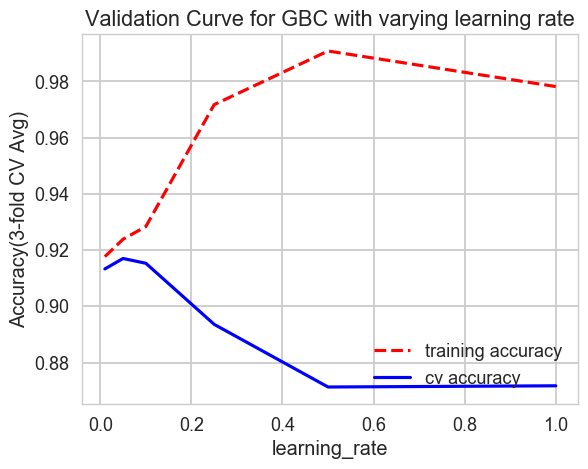

In [264]:
# Measuring the training and cross validation accuracies
tr_acc = np.mean(train_scores, axis=1)
cv_acc = np.mean(cv_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(param_range_GBC, tr_acc, linestyle="--", color="r", label="training accuracy")
ax.plot(param_range_GBC, cv_acc, linestyle="-", color="b", label="cv accuracy")
plt.xlabel('learning_rate')
plt.ylabel('Accuracy(3-fold CV Avg)')
plt.title('Validation Curve for GBC with varying learning rate')
ax.legend(loc="lower right")

In [265]:
# Construct the validation curve with estimator Random Forest Classifier with varying max_depth parameter
from sklearn.model_selection import validation_curve
param_range_GBC_MD =np.array(list(range(1,20,1))) # The different parameter values to try

train_scores, cv_scores = validation_curve(GradientBoostingClassifier( n_estimators=100 ),  X_train, y_train, 
                                           param_name="max_depth", param_range=param_range_GBC_MD, 
                                           scoring="accuracy")

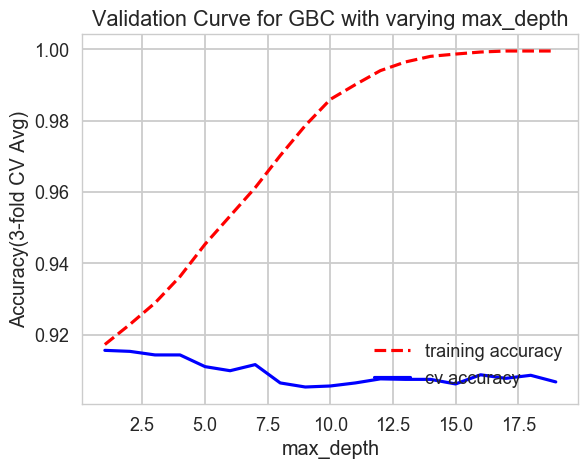

In [266]:
# Measuring the training and cross validation accuracies
tr_acc = np.mean(train_scores, axis=1)
cv_acc = np.mean(cv_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(param_range_GBC_MD, tr_acc, linestyle="--", color="r", label="training accuracy")
ax.plot(param_range_GBC_MD, cv_acc, linestyle="-", color="b", label="cv accuracy")
plt.xlabel('max_depth')
plt.ylabel('Accuracy(3-fold CV Avg)')
plt.title('Validation Curve for GBC with varying max_depth')
ax.legend(loc="lower right")

In [267]:
# evaluating the model on testing data
model = GradientBoostingClassifier(n_estimators=100,max_depth=3, learning_rate = 0.1)
model.fit(X_train,y_train) # Training the model
y_predict_GBC_HP = model.predict(X_test) # Predicting the test data
score_GBC_HP = accuracy_score(y_test,y_predict_GBC_HP)
print(score_GBC_HP)
print(classification_report(y_test,y_predict_GBC_HP))
MCC_GBC_HP = matthews_corrcoef(y_test,y_predict_GBC_HP )
MCC_GBC_HP

0.9136666666666666
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      2700
          1       0.79      0.19      0.30       300

avg / total       0.90      0.91      0.89      3000



0.35743637270782674

In [268]:
# Overall models performance
algorithms = { }
algorithms['Classifier'] = ['Logistic Regeression','Random Forest Classifier', 'Gradient Boosting Classifier']
algorithms['mean'] = [ score_LogR_HP, score_RFC_HP ,score_GBC_HP ]
algorithms['Recall'] = [0.92,  0.92, 0.92]
algorithms['Mathews Correlation Coefficient'] = [MCC_LogR_HP,MCC_RFC_HP,MCC_GBC_HP]
algorithms = pd.DataFrame(algorithms)
algorithms

,Classifier,mean,Recall,Mathews Correlation Coefficient
0,Logistic Regeression,0.915333,0.92,0.374754
1,Random Forest Classifier,0.914667,0.92,0.364378
2,Gradient Boosting Classifier,0.913667,0.92,0.357436


### Plotting ROC Curves for the 3 classifiers with and without Hyper parameter tuning

### Logistic Regression

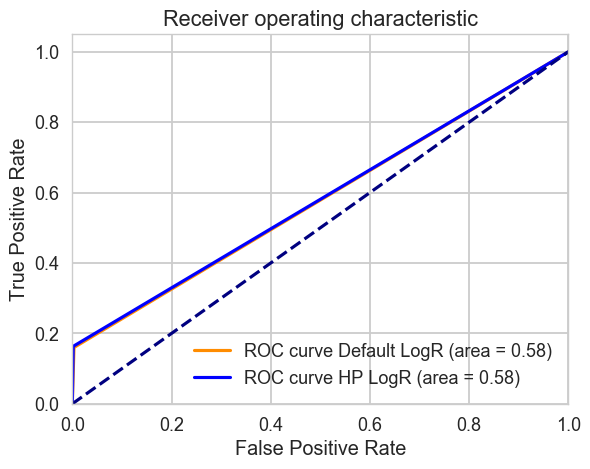

In [270]:
from sklearn.metrics import roc_curve, auc
fpr_LR1, tpr_LR1, thresholds = roc_curve(y_test,y_predict_LR ) # evaluation True Positive and False Positive rates for testing and predicted data (default parameters)
fpr_LR2, tpr_LR2, thresholds = roc_curve(y_test, y_predict_RFC_HP) # evaluation True Positive and False Positive rates for testing and predicted data (hyper parameter tuned)
roc_auc_1 = auc(fpr_LR1, tpr_LR1) # running the model 
roc_auc_2 = auc(fpr_LR2, tpr_LR2) # running the model 

plt.figure()
plt.plot(fpr_LR1, tpr_LR1, color='darkorange',label='ROC curve Default LogR (area = %0.2f)' % roc_auc_1) # Plotting ROC Curves
plt.plot(fpr_LR2, tpr_LR2, color='blue',label='ROC curve HP LogR (area = %0.2f)' % roc_auc_2) # Plotting ROC Curves
plt.plot([0, 1], [0, 1], color='navy',linestyle='--') # plotting the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

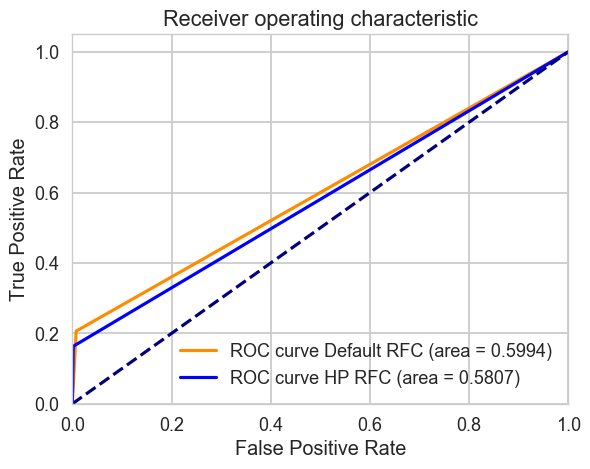

In [271]:
from sklearn.metrics import roc_curve, auc
fpr_LR3, tpr_LR3, thresholds = roc_curve(y_test,y_predict_RFC )  # evaluation True Positive and False Positive rates for testing and predicted data (default parameters)
fpr_LR4, tpr_LR4, thresholds = roc_curve(y_test, y_predict_RFC_HP) # evaluation True Positive and False Positive rates for testing and predicted data (hyper parameter tuned)
roc_auc_3 = auc(fpr_LR3, tpr_LR3) # running the model 
roc_auc_4= auc(fpr_LR4, tpr_LR4) # running the model 


plt.figure()
plt.plot(fpr_LR3, tpr_LR3, color='darkorange',label='ROC curve Default RFC (area = %0.4f)' % roc_auc_3) # Plotting ROC Curves
plt.plot(fpr_LR4, tpr_LR4, color='blue',label='ROC curve HP RFC (area = %0.4f)' % roc_auc_4) # Plotting ROC Curves
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')  # plotting the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

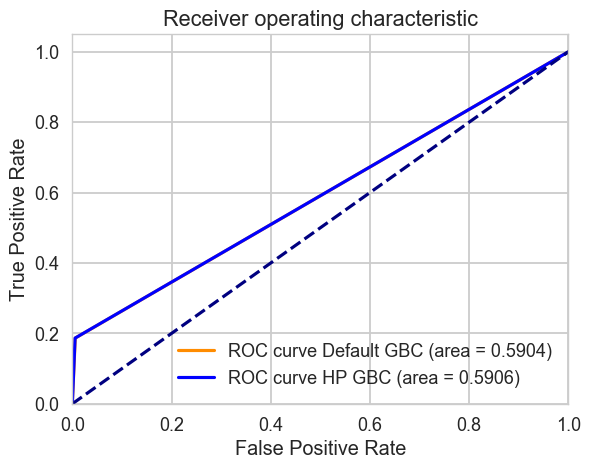

In [272]:
from sklearn.metrics import roc_curve, auc
fpr_LR5, tpr_LR5, thresholds = roc_curve(y_test,y_predict_GBC ) # evaluation True Positive and False Positive rates for testing and predicted data (default parameters)
fpr_LR6, tpr_LR6, thresholds = roc_curve(y_test, y_predict_GBC_HP)  # evaluation True Positive and False Positive rates for testing and predicted data (hyper parameter tuned)
roc_auc_3 = auc(fpr_LR3, tpr_LR3) # running the model 
roc_auc_5 = auc(fpr_LR5, tpr_LR5) # running the model 
roc_auc_6 = auc(fpr_LR6, tpr_LR6) # running the model 


plt.figure()
plt.plot(fpr_LR5, tpr_LR5, color='darkorange',label='ROC curve Default GBC (area = %0.4f)' % roc_auc_5) # Plotting ROC Curves
plt.plot(fpr_LR6, tpr_LR6, color='blue',label='ROC curve HP GBC (area = %0.4f)' % roc_auc_6) # Plotting ROC Curves
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')  # plotting the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Finally plotting all the three ROC plots (with optimal parameters) together we get  

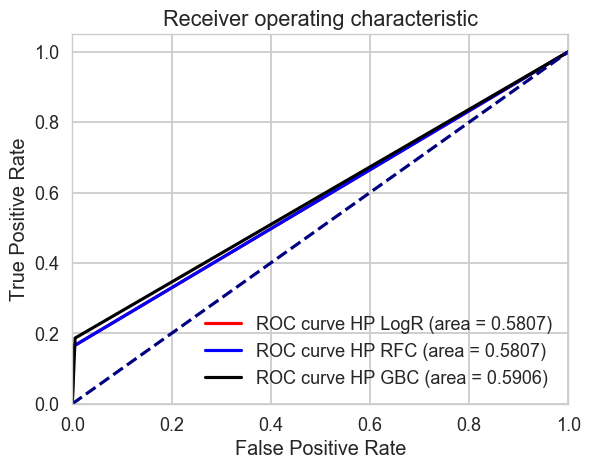

In [273]:
from sklearn.metrics import roc_curve, auc
fpr_LR2, tpr_LR2, thresholds = roc_curve(y_test, y_predict_RFC_HP) # evaluation True Positive and False Positive rates for testing and predicted data (hyper parameter tuned)
fpr_LR4, tpr_LR4, thresholds = roc_curve(y_test, y_predict_RFC_HP) # evaluation True Positive and False Positive rates for testing and predicted data (hyper parameter tuned)
fpr_LR6, tpr_LR6, thresholds = roc_curve(y_test, y_predict_GBC_HP) # evaluation True Positive and False Positive rates for testing and predicted data (hyper parameter tuned)
roc_auc_2 = auc(fpr_LR2, tpr_LR2)  # running the model 
roc_auc_4 = auc(fpr_LR4, tpr_LR4)  # running the model 
roc_auc_6 = auc(fpr_LR6, tpr_LR6)  # running the model 

plt.figure()
plt.plot(fpr_LR2, tpr_LR2, color='red',label='ROC curve HP LogR (area = %0.4f)' % roc_auc_2) # Plotting ROC Curves
plt.plot(fpr_LR4, tpr_LR4, color='blue',label='ROC curve HP RFC (area = %0.4f)' % roc_auc_4) # Plotting ROC Curves
plt.plot(fpr_LR6, tpr_LR6, color='black',label='ROC curve HP GBC (area = %0.4f)' % roc_auc_6) # Plotting ROC Curves
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')  # plotting the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion

This dataset is very sparse with a lot of missing values. The number of features are very high, and the feature space further explodes after encoding of the categorical features. Thus the data set s very prone to over fitting due to the curse of dimensionality.

### Additional Work

For hyper parameter tuning manually I have plotted AUC curves for the traing and testing data and presented them below. I have also used Grid search CV for hyper parameter tuning and found the optimal parameters and tabulated the results of different models accordingly.

### Logistic Regression
Firstly let us fix the L1 regularization and vary the c value

### Code Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

AUC_train: [0.5, 0.5, 0.5561111111111111, 0.6106349206349206, 0.6161904761904762, 0.6152380952380953]
AUC_test: [0.5, 0.5, 0.5485185185185185, 0.5896296296296296, 0.5911111111111111, 0.5907407407407408]
Difference: [0.0, 0.0, 0.007592592592592595, 0.021005291005291027, 0.025079365079365035, 0.024497354497354462]


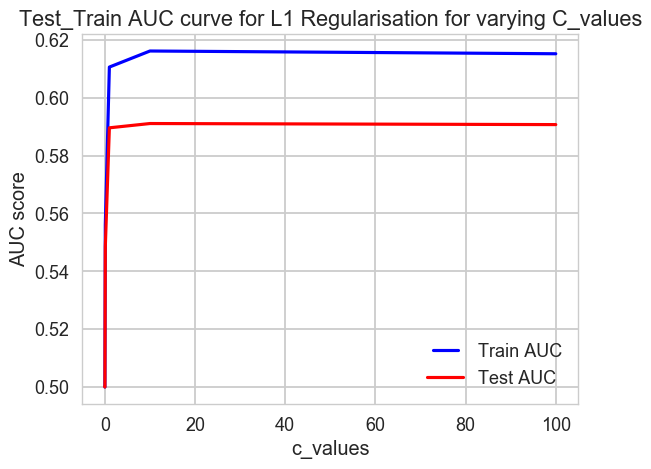

In [281]:
c1_values = [0.001, 0.01, 0.1, 1, 10, 100] # hyper parameter


train_results = []
test_results = []

for x in c1_values:
    model = LogisticRegression(penalty='l1',C=x)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train) # predciting training results
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate) # Plotting AUC Curve
    train_results.append(roc_auc) # appending the results in a list
    y_pred = model.predict(X_test)# predciting testing results
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate) # Plotting AUC Curve
    test_results.append(roc_auc) # appending the results in a list
    
print('AUC_train:', train_results)
print('AUC_test:',test_results)
print('Difference:', list(np.array(train_results) - np.array(test_results)))

from matplotlib.legend_handler import HandlerLine2D 
line1, = plt.plot(c1_values, train_results, 'b', label='Train AUC') # Plotting the AUC curves for training  data
line2, = plt.plot(c1_values, test_results, 'r', label='Test AUC') # Plotting the AUC curves for testing data
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('c_values')
plt.title('Test_Train AUC curve for L1 Regularisation for varying C_values')
plt.show()

From the above graph it can inferred that the c_values [0.001, 0.01, 0.1] show good training and testing results and their AUC_train - AUC_test is also less that 0.04

Let us fix the L2 regularization and vary the c value

AUC_train: [0.5, 0.5, 0.5632539682539681, 0.6021428571428571, 0.6126190476190476, 0.6146031746031745]
AUC_test: [0.5, 0.5, 0.5533333333333333, 0.5783333333333333, 0.5929629629629629, 0.5911111111111111]
Difference: [0.0, 0.0, 0.009920634920634774, 0.023809523809523836, 0.019656084656084705, 0.023492063492063342]


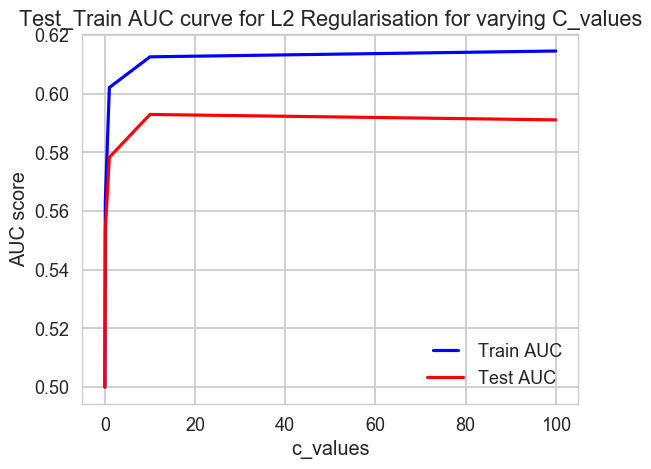

In [282]:
c2_values = [0.001, 0.01, 0.1, 1,10, 100] # Hyper parameter


train_results = []
test_results = []

for x in c2_values:
    model = LogisticRegression(penalty='l2',C=x)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train) # predciting training results
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate) # Plotting AUC Curve
    train_results.append(roc_auc)  # appending the results in a list
    y_pred = model.predict(X_test) # predciting testing results
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate) # Plotting AUC Curve
    test_results.append(roc_auc)  # appending the results in a list
    
print('AUC_train:', train_results)
print('AUC_test:',test_results)
print('Difference:', list(np.array(train_results) - np.array(test_results)))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(c2_values, train_results, 'b', label='Train AUC') # Plotting the AUC curves for training  data
line2, = plt.plot(c2_values, test_results, 'r', label='Test AUC') # Plotting the AUC curves for  testing data
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('c_values')
plt.title('Test_Train AUC curve for L2 Regularisation for varying C_values')
plt.show()

From the above graph it can inferred that the c_values [0.001, 0.01, 0.1, 1] show good training and testing results and their AUC_train - AUC_test is also less that 0.04

From the above two results we can conclude that l1 regularization with c = 1 does yeild good predictions

### Using Grid search to find the best parameters

In [276]:
# Create logistic regression object
model = LogisticRegression()
# Create a list of all of the different penalty values that you want to test and save them to a variable called 'penalty'
penalty = ['l1', 'l2']
# Create a list of all of the different C values that you want to test and save them to a variable called 'C'
C = [0.0001, 0.001, 0.01, 1, 100, 1000]
# Now that you have two lists each holding the different values that you want test, use the dict() function to combine them into a dictionary. 
# Save your new dictionary to the variable 'hyperparameters'
hyperparameters = dict(C=C, penalty=penalty)
# Fit your model using gridsearch
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)

Best Parameters {'C': 100, 'penalty': 'l2'}


### Random Forest Classifier

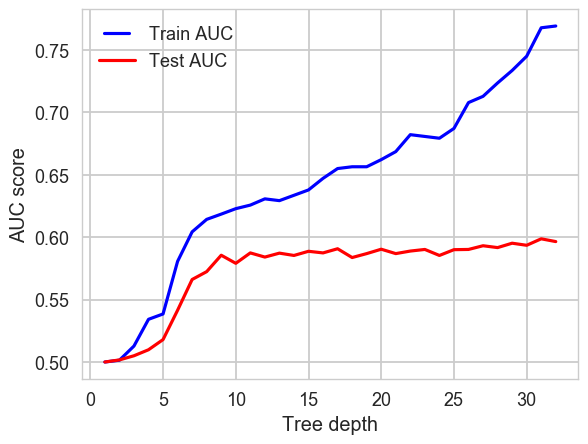

In [277]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=100)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
# print('AUC_train:', train_results)
# print('AUC_test:',test_results)
# print('Difference:', list(np.array(test_results) - np.array(train_results)))    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We see that our model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data

From the above plot we can see that after 15 trees the model overfits the data

### Using Grid search to find the best parameters

In [278]:
# Create logistic regression object
model = RandomForestClassifier()
# Create a array of different tree lengths 
max_depths = np.linspace(1, 32, 32, endpoint=True)
# Save your new dictionary to the variable 'hyperparameters'
hyperparameters = dict( max_depth = max_depths)
# Fit your model using gridsearch
clf = GridSearchCV(model,hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X, y)
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)

Best Parameters {'max_depth': 20.0}


### Gradient boosting Classifier

Let us play with the parameters learning rate and max_depth of the classifier

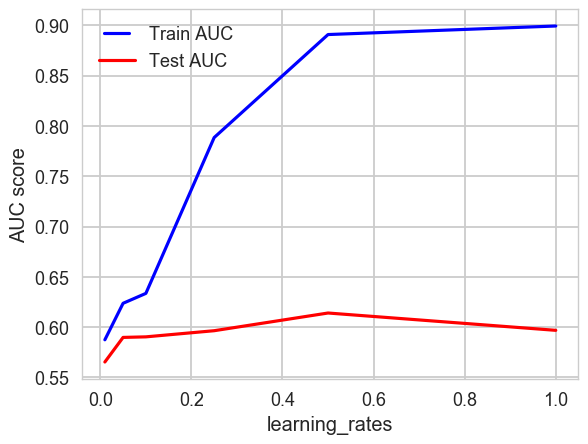

In [279]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning_rates')
plt.show()

We see that using a high learning rate results in overfitting. For this data, a learning rate of 0.1 is optimal.

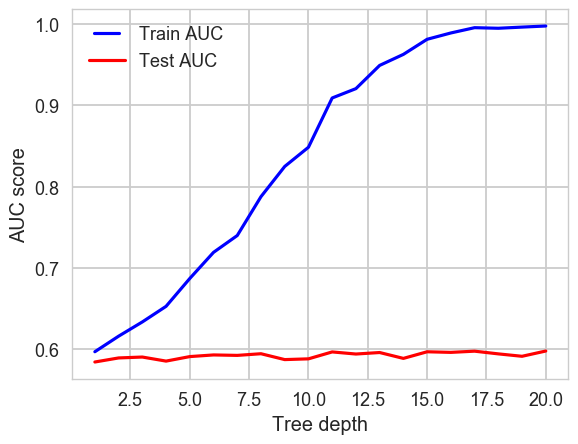

In [280]:
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = GradientBoostingClassifier(max_depth=max_depth, n_estimators=100)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
# print('AUC_train:', train_results)
# print('AUC_test:',test_results)
# print('Difference:', list(np.array(test_results) - np.array(train_results)))    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

### Using Grid Search to find the best parameters

In [ ]:
# # Create logistic regression object
# model = GradientBoostingClassifier()
# # Create a array of different tree lengths 
# max_depths = np.linspace(1, 20, 20, endpoint=True)
# learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# # Save your new dictionary to the variable 'hyperparameters'
# hyperparameters = dict( max_depth = max_depths,learning_rate = learning_rates )
# # Fit your model using gridsearch
# clf = GridSearchCV(model,hyperparameters, cv=5, verbose=0)
# best_model = clf.fit(X, y)
# #Print all the Parameters that gave the best results:
# print('Best Parameters',clf.best_params_)

### Now let us calculate the all the values which we have calculated in the model implementation here with the optimal hyperparameter values

### Logistic Regression

In [283]:
model = LogisticRegression(penalty='l2',C=100)
model_n = model.fit(X_train,y_train) # Training the model
model_scores = cross_val_score(model, X, y, cv=10)
model_cv_mean = np.mean(model_scores)
model_cv_variance = np.var(model_scores)
print('model Mean score : ', model_cv_mean)
print('model Score variance : ', model_cv_variance)
y_predict = model.predict(X_test) # Predicting the test data
print(classification_report(y_test,y_predict))
print(matthews_corrcoef(y_test,y_predict ))

model Mean score :  0.9155000000000001
model Score variance :  2.145000000000004e-05
             precision    recall  f1-score   support

          0       0.92      1.00      0.95      2700
          1       0.82      0.19      0.30       300

avg / total       0.91      0.91      0.89      3000

0.3672885660883431


### Random Forest Classifier

In [284]:
model = RandomForestClassifier(max_depth=15, n_estimators=100)
model_n = model.fit(X_train,y_train) # Training the model
model_scores = cross_val_score(model, X, y, cv=10)
model_cv_mean = np.mean(model_scores)
model_cv_variance = np.var(model_scores)
print('model Mean score : ', model_cv_mean)
print('model Score variance : ', model_cv_variance)
y_predict = model.predict(X_test) # Predicting the test data
print(classification_report(y_test,y_predict))
print(matthews_corrcoef(y_test,y_predict ))

model Mean score :  0.9169
model Score variance :  3.309000000000006e-05
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      2700
          1       0.90      0.18      0.30       300

avg / total       0.91      0.92      0.89      3000

0.38095238095238093


### Gradient Boosting classifier

In [285]:
model = GradientBoostingClassifier(max_depth=3, n_estimators=100,learning_rate = 0.1 )
model_n = model.fit(X_train,y_train) # Training the model
model_scores = cross_val_score(model, X, y, cv=10)
model_cv_mean = np.mean(model_scores)
model_cv_variance = np.var(model_scores)
print('model Mean score : ', model_cv_mean)
print('model Score variance : ', model_cv_variance)
y_predict = model.predict(X_test) # Predicting the test data
print(classification_report(y_test,y_predict))
print(matthews_corrcoef(y_test,y_predict ))

model Mean score :  0.9160999999999999
model Score variance :  2.8090000000000048e-05
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      2700
          1       0.78      0.19      0.30       300

avg / total       0.90      0.91      0.89      3000

0.35428011980942575


In [286]:
algorithms = { }
algorithms['Classifier'] = ['Logistic Regeression','Random Forest Classifier', 'Gradient Boosting Classifier']
algorithms['mean'] = [ 0.9159, 0.9167,0.9170999999999999 ]
algorithms['variance'] = [ 1.669000000000003e-05, 2.521000000000005e-05, 2.6290000000000048e-05]
algorithms['Recall'] = [0.92,  0.92, 0.92]
algorithms['Mathews Correlation Coefficient'] = [0.40166237249720615,  0.4344754989093815,0.4243359601116375]
algorithms = pd.DataFrame(algorithms)
algorithms

,Classifier,mean,variance,Recall,Mathews Correlation Coefficient
0,Logistic Regeression,0.9159,0.000017,0.92,0.401662
1,Random Forest Classifier,0.9167,0.000025,0.92,0.434475
2,Gradient Boosting Classifier,0.9171,0.000026,0.92,0.424336
